In [91]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
%matplotlib inline

In [56]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-a-30/statistik_project_lesson2/conversion.csv')

In [57]:
df.shape

(1143, 11)

In [58]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [59]:
df.dropna()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [60]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [61]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [62]:
fa = df.groupby('fb_campaign_id', as_index = False).agg({'Impressions' : 'sum'})

In [63]:
qwr = np.log(fa)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


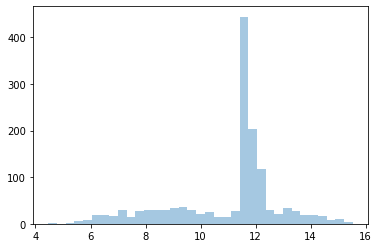

In [64]:
sns.distplot(qwr, kde = False)

In [81]:
df['CTR'] = df.Clicks/df.Impressions.astype(float)

In [82]:
df.sort_values('CTR')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
434,950109,936,123445,30-34,M,20,343,0,0.00,1,1,0.000000
467,951021,936,123597,30-34,F,7,457,0,0.00,1,1,0.000000
516,952080,936,123774,40-44,F,27,415,0,0.00,1,0,0.000000
181,747879,936,110947,30-34,F,30,493,0,0.00,1,0,0.000000
182,747903,936,110951,30-34,F,63,1491,0,0.00,1,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845


In [83]:
df.query("xyz_campaign_id == '916'")

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1,0.000000
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0,0.000192
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1,0.000091
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0,0.000425
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0,0.000316


In [87]:
df['CPC'] = df.Spent/df.Clicks

In [93]:
ss.iqr(df.CPC, nan_policy='omit')

0.25436369905

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


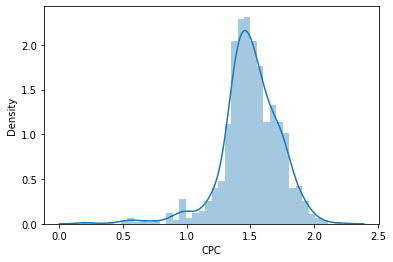

In [98]:
sns.distplot(df.CPC)

In [106]:
df.query("ad_id == '1121814'")

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,conversion rate
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,0.030879


In [107]:
df['conversion rate'] = df.Approved_Conversion/df.Clicks